In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [6]:
# Set the start and end date
start_date = '2016-01-01'
end_date = '2020-03-31'
# Set the ticker
tickers = ['FB', 'NFLX','CRM','BUD', 'AAXN','MSFT','GWPH', 'SQ','CVX','AAPL']
weights = np.array(np.random.random(len(tickers))) 
weights = weights/np.sum(weights)  
           
ticker_allocs = {'FB':0.13,'NFLX':0.06,'CRM':0.07,'BUD':0.09,'AAXN':0.05,'MSFT':0.12,'GWPH':0.09,'SQ':0.06,'CVX':0.07,'AAPL':0.32}
total_inv_amount = 20228.18

df = data.get_data_yahoo(tickers, start_date, end_date)['Adj Close']
df1 = df.copy()
df1

Symbols,FB,NFLX,CRM,BUD,AAXN,MSFT,GWPH,SQ,CVX,AAPL
Date,,,,,,,,,,
2016-01-04,102.220001,109.959999,76.709999,107.600929,16.830000,50.398834,68.459999,12.160000,74.822914,98.213585
2016-01-05,102.730003,107.660004,77.050003,107.671211,17.020000,50.628761,68.370003,11.510000,75.462914,95.752419
2016-01-06,102.970001,117.680000,76.290001,105.632889,17.639999,49.709072,63.860001,11.520000,72.481781,93.878586
2016-01-07,97.919998,114.559998,74.300003,104.965157,16.590000,47.980057,61.810001,11.160000,69.913307,89.916473
2016-01-08,97.330002,111.389999,73.230003,102.909256,16.280001,48.127216,59.860001,11.310000,69.163826,90.391907
...,...,...,...,...,...,...,...,...,...,...
2020-03-25,156.210007,342.390015,147.059998,45.590000,71.150002,146.919998,88.910004,52.389999,69.269997,245.520004
2020-03-26,163.339996,362.989990,154.729996,46.299999,76.519997,156.110001,86.559998,56.029999,76.379997,258.440002
2020-03-27,156.789993,357.119995,146.000000,42.990002,74.410004,149.699997,85.750000,53.340000,68.779999,247.740005


In [0]:
for k,v in ticker_allocs.items():
    df1[k] = df1[k]/df1.iloc[0][k]
    df1[k] = df1[k]*v
    df1[k] = df1[k]*total_inv_amount

In [0]:
df1['Total'] = df1.sum(axis=1)

In [9]:
df1.head()

Symbols,FB,NFLX,CRM,BUD,AAXN,MSFT,GWPH,SQ,CVX,AAPL,Total
Date,,,,,,,,,,,
2016-01-04,2629.663400,1213.690800,1415.972600,1820.536200,1011.409000,2427.381600,1820.536200,1213.690800,1415.972600,6473.017600,21441.870800
2016-01-05,2642.783474,1188.304448,1422.248657,1821.725324,1022.827197,2438.455680,1818.142954,1148.814273,1428.084152,6310.808133,21242.194291
2016-01-06,2648.957545,1298.900827,1408.219948,1787.238263,1060.086407,2394.160279,1698.209822,1149.812397,1371.668253,6187.308394,21004.562135
2016-01-07,2519.043555,1264.463589,1371.487026,1775.940678,996.986069,2310.884939,1643.694808,1113.880700,1323.061638,5926.175237,20245.618239
2016-01-08,2503.865589,1229.474523,1351.736142,1741.156207,978.356464,2317.972651,1591.839023,1128.852272,1308.878218,5957.509888,20109.640978


In [0]:
df1['Daily Return'] = df1['Total'].pct_change(1)

In [11]:
# average daily return
print(df1['Daily Return'].mean())

# standard deviation
print(df1['Daily Return'].std())

0.0009085859596013703
0.01582421669371298


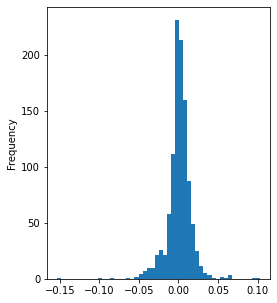

In [12]:
df1['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))

In [0]:
#Sharpe Ratio
sharpe_ratio = df1['Daily Return'].mean() / df1['Daily Return'].std()

In [15]:
sharpe_ratio

0.0574174366534272

In [16]:
ASR = (252**0.5) * sharpe_ratio
ASR

0.9114735498226385

In [18]:
log_return = np.log(df/df.shift(1))
log_return.head()

Symbols,FB,NFLX,CRM,BUD,AAXN,MSFT,GWPH,SQ,CVX,AAPL
Date,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.004977,-0.021139,0.004423,0.000653,0.011226,0.004552,-0.001315,-0.054936,0.008517,-0.025379
2016-01-06,0.002333,0.088991,-0.009913,-0.019112,0.035780,-0.018332,-0.068241,0.000868,-0.040306,-0.019764
2016-01-07,-0.050287,-0.026870,-0.026431,-0.006341,-0.061369,-0.035402,-0.032628,-0.031749,-0.036079,-0.043121
2016-01-08,-0.006044,-0.028061,-0.014506,-0.019781,-0.018863,0.003062,-0.032057,0.013351,-0.010778,0.005274


In [0]:
meanReturns = log_return.mean() 
covMatrix = log_return.cov()
rfr = 0.0011

In [0]:
# Monte Carlo Simulation
num_portfolios = 25000
all_weights = np.zeros((num_portfolios, len(df.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios): 
    # weights 
    weights = np.array(np.random.random(len(tickers))) 
    weights = weights/np.sum(weights)  
	
    # save the weights
    all_weights[ind,:] = weights
	
    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = (ret_arr[ind]-rfr)/vol_arr[ind]

In [21]:
# maximum sharpe ratio
sharpe_arr.max()

0.9597395457724994

In [0]:
#get index of maximum sharpe ratio to calculate weights
argmax = sharpe_arr.argmax()
all_weights[argmax,:]

In [0]:
# get returns and volatility coreesponding to maximum sharpe ratio
max_sr_ret = ret_arr[argmax]
max_sr_vol = vol_arr[argmax]
print(max_sr_ret)
print(max_sr_vol)

In [0]:
#get minimum volatility
min_vol = vol_arr.min()

In [34]:
#get index of minimum volatility to calculate weights
argmin = vol_arr.argmin()
all_weights[argmin,:]

array([0.03580518, 0.04406221, 0.00160412, 0.28712826, 0.05981556,
       0.19637341, 0.04588377, 0.00354208, 0.20173493, 0.12405049])

In [35]:
# get returns and sharpe ratio coreesponding to minimum volatility
min_vol_ret = ret_arr[argmin]
min_vol_sr = sharpe_arr[argmin]
print(min_vol_ret)
print(min_vol_sr)

0.06013480030636245
0.2698605380895755


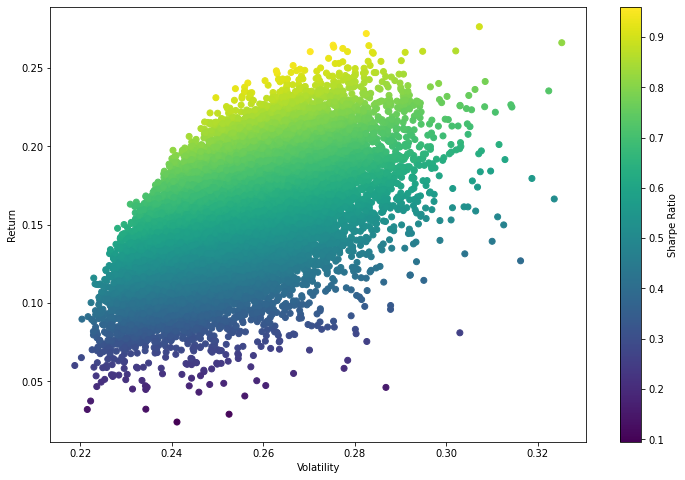

In [24]:
#plot volatility vs return
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

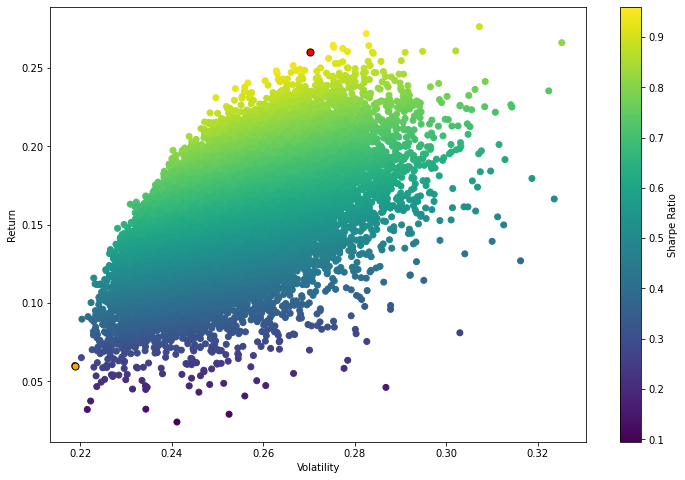

In [38]:
# plot the maximumsharpe ratio and minimum volatility points
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,marker ='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black');
plt.scatter(min_vol, min_vol_ret, c='orange', s=50, edgecolors='black');

In [0]:
# function that calculates and returns the annual returns, volatility and sharpe ratio
def ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean()*weights)*252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sr = (ret-rfr)/vol
    return np.array([ret,vol,sr])

In [0]:
from scipy.optimize import minimize

In [0]:
# minimize negative Sharpe Ratio
def neg_sharpe(weights): 
	return ret_vol_sr(weights)[2] * -1

In [0]:
# minimize portfolio volatility
def portfolio_vol(weights): 
	return ret_vol_sr(weights)[1]

In [0]:
# check allocation sums to 1
def check_sum(weights): 
	return np.sum(weights) - 1

In [0]:
# annual returns
def portfolio_ret(weights):
        return ret_vol_sr(weights)[0]

In [0]:
# create constraint variable
cons1 = ({'type':'eq','fun':check_sum})

In [0]:
# bounds
bounds = tuple( (0,1) for asset in range(len(tickers)))

In [0]:
# initial guess
percent_alloc = 1/len(tickers)
init_guess = []
for i in range(len(tickers)):
    init_guess.append(percent_alloc)

In [0]:
# get the maximum sharpe portfolio by minimizing the negative sharpe ratio
max_sharpe_portfolio = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons1)

In [0]:
# get the minimum volatility portfolio
min_vol_portfolio = minimize(portfolio_vol, init_guess, method='SLSQP', bounds=bounds, constraints=cons1)

In [52]:
#annual returns, volatility, sharpe ratio of maximum sharpe portfolio
et_vol_sr(max_sharpe_portfolio.x)

array([0.28545729, 0.2624236 , 1.08358122])

In [53]:
#annual returns, volatility, sharpe ratio of minimum volatility portfolio
ret_vol_sr(min_vol_portfolio.x)

array([0.02751631, 0.21594969, 0.12232623])

In [54]:
# weights of assets in maximum sharpe portfolio
np.round(max_sharpe_portfolio.x,3)

array([0.   , 0.133, 0.   , 0.   , 0.205, 0.595, 0.   , 0.017, 0.   ,
       0.05 ])

In [55]:
# weights of assets in minimum volatility portfolio
np.round(min_vol_portfolio.x,3)

array([0.084, 0.038, 0.029, 0.376, 0.038, 0.111, 0.03 , 0.   , 0.124,
       0.169])

In [0]:
# target returns for efficient frontier
targetReturns = np.linspace(0.02, 0.30, 50)

In [0]:
# efficient portfolios with minimu volatility
efficientPortfolios=[]
for target in targetReturns:
    cons2 = ({'type':'eq','fun':lambda x: portfolio_ret(x)-target},{'type':'eq','fun':check_sum})
    efficientPortfolios.append(minimize(portfolio_vol, init_guess, method='SLSQP', bounds=bounds, constraints=cons2)) 

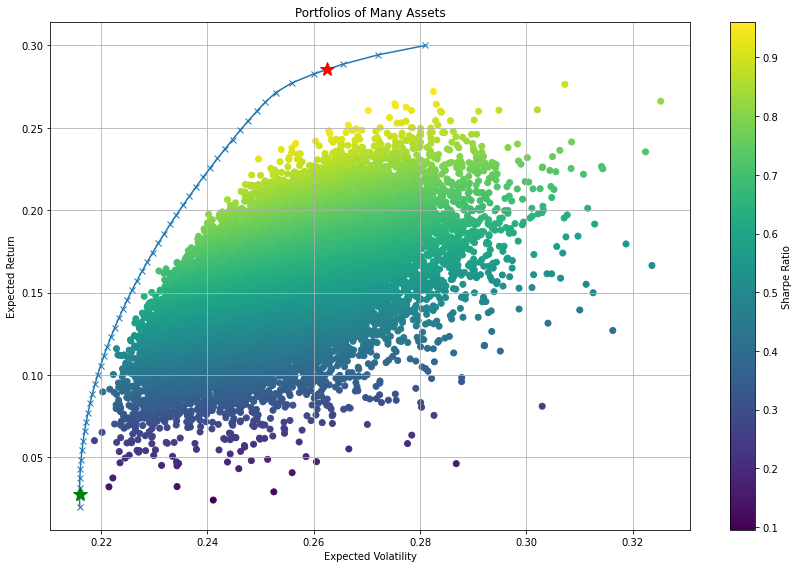

In [61]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,marker ='o')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot([p['fun'] for p in efficientPortfolios], targetReturns, marker='x')

rp = ret_vol_sr(max_sharpe_portfolio['x'])[0]
sdp = ret_vol_sr(max_sharpe_portfolio['x'])[1]
plt.plot(sdp, rp, 'r*', markersize=15.0)

rp1 = ret_vol_sr(min_vol_portfolio['x'])[0]
sdp1 = ret_vol_sr(min_vol_portfolio['x'])[1]
plt.plot(sdp1, rp1, 'g*', markersize=15.0)

plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Portfolios of Many Assets')
plt.tight_layout()
plt.savefig('Monte Carlo Simulation for Portfolio', dpi=100)

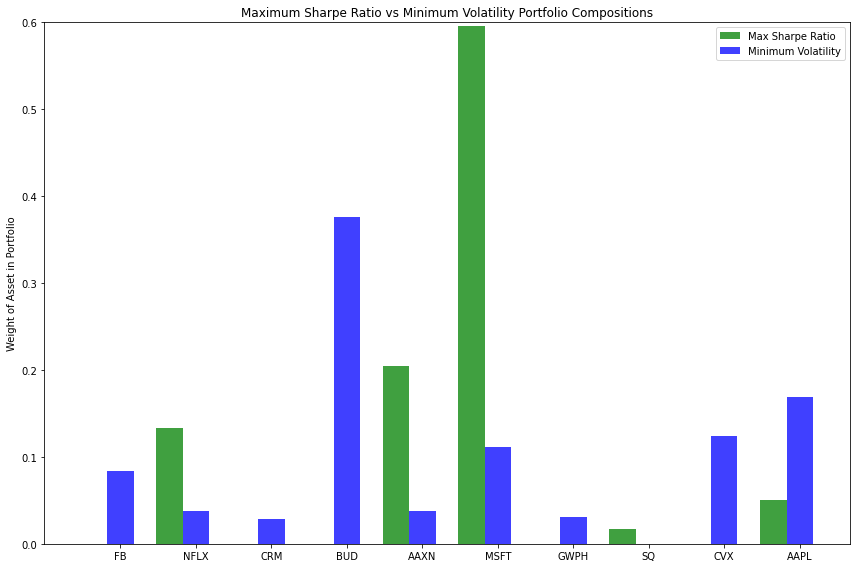

In [62]:
# plot weights comparison for maximum sharpe vs minimum volatility portfolios
ind = np.arange(len(tickers))
width = 0.35
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, max_sharpe_portfolio['x'], width, color='g', alpha=0.75)
rects2 = ax.bar(ind + width, min_vol_portfolio['x'], width, color='b', alpha=0.75)
ax.set_ylabel('Weight of Asset in Portfolio')
ax.set_ylim(0,0.6)
ax.set_title('Maximum Sharpe Ratio vs Minimum Volatility Portfolio Compositions')
ax.set_xticks(ind + width)
ax.set_xticklabels(tickers)
plt.tight_layout()
ax.legend((rects1[0], rects2[0]), ('Max Sharpe Ratio', 'Minimum Volatility'))
#plt.savefig('Portfolio Compositions', dpi=100)
plt.show()
